In [1]:
import networkx as nx
G = nx.DiGraph()

CodeQL has external prerequisites.  The following are based on Stanford's course offerings to serve as reference.  Equivalent courses or equivalent experience can of course be substituted.

- https://cs.stanford.edu/academics/courses

Numbering System

The first digit of a CS course number indicates its general level of difficulty:

- 0-99 service course for non-technical majors
- 100-199 other service courses, basic undergraduate
- 200-299 advanced undergraduate/beginning graduate
- 300-399 advanced graduate
- 400-499 experimental
- 500-599 graduate seminars

The ten's digit indicates the area of Computer Science it addresses:

- 00-09 Introductory, miscellaneous
- 10-19 Hardware Systems
- 20-29 Artificial Language
- 30-39 Numerical Analysis
- 40-49 Software Systems
- 50-59 Mathematical Foundations of Computing
- 60-69 Analysis of Algorithms
- 70-79 Computational Biology and Interdisciplinary Topics
- 90-99 Independent Study and Practicum

Prefix Legend:
- `c-` C/C++
- `l-` Learner

In [2]:
G.add_node("c-303", title = "Dataflow III")
G.add_node("c-303", title = "Reasoning about Integer Sign Conversion")
G.add_node("c-302", title = "Program Analysis III")
G.add_node("c-401", title = "Program Analysis IV -- Dangling pointers")
G.add_node("c-403", title = "Dataflow IV -- Reasoning about Runtime Values")
G.add_node("c-203", title = "Dataflow II")
G.add_node("c-303", title = "Dataflow III")
G.add_node("c-202", title = "Reasoning about Control Flow II")
G.add_node("c-201", title = "Elements of Syntactical Program Analysis II")
G.add_node("c-103", title = "Dataflow I")
G.add_node("c-102", title = "Reasoning about Control Flow I")
G.add_node("c-101", title = "Elements of Syntactical Program Analysis I")
G.add_node("l-090", title = "Starting out", shape="oval")
G.add_node("l-190", title = "CodeQL customizer", shape="oval")

In [3]:
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

In [4]:
# set defaults
G.graph['graph']={'rankdir':'TD', 'fontsize':9}
G.graph['node']={'shape':'rect', 'fontsize':12}
G.graph['edges']={'arrowsize':'4.0', 'fontsize':12}

In [5]:
def ae(n1, n2):
    G.add_edge("c-%d" % n1, "c-%d" %n2)
G.add_edge("l-090", "c-101")
G.add_edge("c-101", "c-102")
G.add_edge("c-101", "c-103")
G.add_edge("c-101", "c-201")
G.add_edge("c-102", "c-202")
G.add_edge("c-103", "c-203")
G.add_edge("c-102", "l-190")
G.add_edge("c-103", "l-190")
G.add_edge("c-203", "c-303")
G.add_edge("c-303", "c-403")
G.add_edge("c-201", "c-302")
G.add_edge("c-202", "c-302")
G.add_edge("c-203", "c-303")
G.add_edge("c-302", "c-401")
G.add_edge("c-303", "c-401")

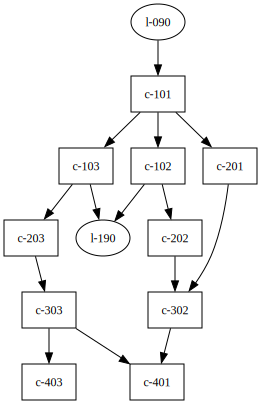

In [6]:
from IPython.display import SVG, display

def draw(graph):
    svg = nx.nx_agraph.to_agraph(graph).draw(prog='dot',format='svg')
    display(SVG(svg))
    
draw(G)

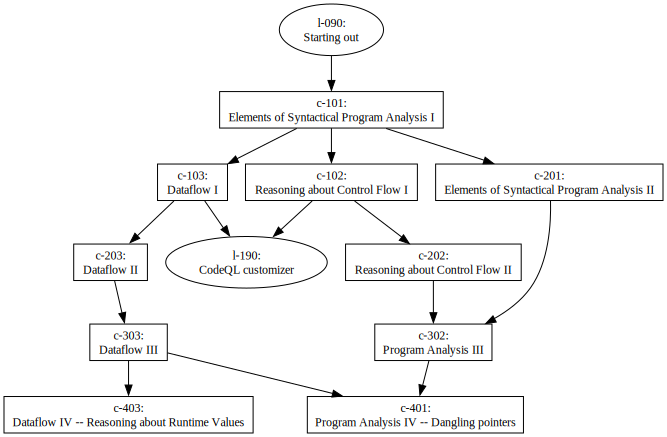

In [7]:
r0 = dict([name, name+":\\n "+dd['title']] for (name, dd) in list(G.nodes.items()))
G1 = nx.relabel_nodes(G, r0)
draw(G1)

And now get all nodes along a learning path

In [8]:
lp1 = list(nx.all_simple_paths(G, "l-090", "l-190"))
lp1

[['l-090', 'c-101', 'c-102', 'l-190'], ['l-090', 'c-101', 'c-103', 'l-190']]

And emphasize them

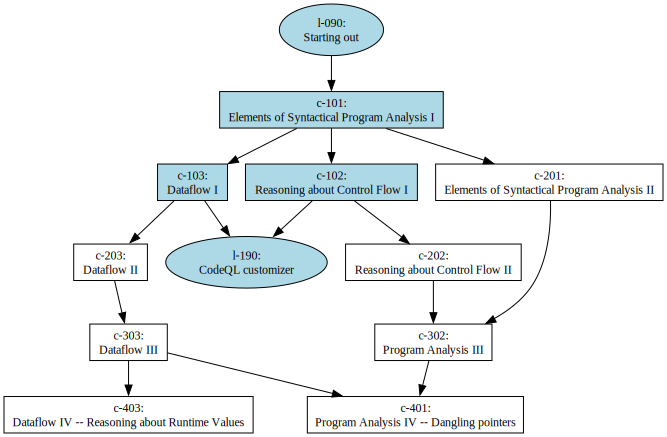

In [9]:
G2 = G.copy()
nv2 = G2.nodes()
for p0 in lp1:
    for n0 in p0:
        nv2[n0]['fillcolor'] = 'lightblue'
        nv2[n0]['style'] = 'filled'
G3 = nx.relabel_nodes(G2, r0)
draw(G3)

In [10]:
G3ag = nx.nx_agraph.to_agraph(G3)

In [11]:
G3ag.layout(prog='dot')

In [12]:
[G3ag.get_node(nd) for nd in G3ag.nodes_iter()]

['c-303:\\n Dataflow III',
 'c-401:\\n Program Analysis IV -- Dangling pointers',
 'c-403:\\n Dataflow IV -- Reasoning about Runtime Values',
 'c-302:\\n Program Analysis III',
 'c-203:\\n Dataflow II',
 'c-202:\\n Reasoning about Control Flow II',
 'c-201:\\n Elements of Syntactical Program Analysis II',
 'c-103:\\n Dataflow I',
 'l-190:\\n CodeQL customizer',
 'c-102:\\n Reasoning about Control Flow I',
 'c-101:\\n Elements of Syntactical Program Analysis I',
 'l-090:\\n Starting out']

In [13]:
[a0 for a0 in G3ag.get_node('l-090:\\n Starting out').attr]


['fillcolor', 'height', 'pos', 'shape', 'style', 'title', 'width']

In [14]:
G3ag.get_node('l-090:\\n Starting out').attr['pos']

'327.62,403.43'

In [15]:
for nd0 in G3ag.nodes_iter():
    print(nd0)
    for a0 in G3ag.get_node(nd0).attr:
        v0 = G3ag.get_node(nd0).attr[a0]
        print(' - ', a0, ": ", v0)

c-303:\n Dataflow III
 -  height :  0.50694
 -  pos :  124.62,90.75
 -  title :  Dataflow III
 -  width :  1.0764
c-401:\n Program Analysis IV -- Dangling pointers
 -  height :  0.50694
 -  pos :  411.62,18.25
 -  title :  Program Analysis IV -- Dangling pointers
 -  width :  3.0035
c-403:\n Dataflow IV -- Reasoning about Runtime Values
 -  height :  0.50694
 -  pos :  124.62,18.25
 -  title :  Dataflow IV -- Reasoning about Runtime Values
 -  width :  3.4618
c-302:\n Program Analysis III
 -  height :  0.50694
 -  pos :  429.62,90.75
 -  title :  Program Analysis III
 -  width :  1.6285
c-203:\n Dataflow II
 -  height :  0.50694
 -  pos :  106.62,170.81
 -  title :  Dataflow II
 -  width :  1.0243
c-202:\n Reasoning about Control Flow II
 -  height :  0.50694
 -  pos :  429.62,170.81
 -  title :  Reasoning about Control Flow II
 -  width :  2.441
c-201:\n Elements of Syntactical Program Analysis II
 -  height :  0.50694
 -  pos :  545.62,250.87
 -  title :  Elements of Syntactical Prog